PPCA lavora con più variabili osservabili anzichè una sola

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import aesara.tensor as at
import arviz as az
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from scipy import stats
import scipy
import pandas as pd

In [2]:
scaler = StandardScaler()

# extract data social anxiety

In [3]:
csv_ = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive/behavior/LookAtMe_045.csv'
#csv_ = '/home/paolo/matteo/matteo/unimi/tesi_master/code/osfstorage-archive/behavior/LookAtMe_045.csv'
global_data = pd.read_csv(csv_, sep='\t')
y = np.array(list([int(d>2) for d in global_data['rating']]))
e_labels = y[:,np.newaxis]  # rating > 2

In [4]:
print(len(e_labels))

160


In [5]:
N_e = e_labels.shape[0]
D_e = e_labels.shape[1]
print(N_e,D_e)

160 1


## test with new data

In [6]:
from fear_gen.deepemogp import feature_extractor
from fear_gen.deepemogp.signal import physio as physio
from fear_gen.deepemogp import datasets as datasets
from fear_gen.deepemogp.signal import behavior as behavior

# from: https://github.com/SheffieldML/GPy
#import GPy
# from: https://github.com/SheffieldML/PyDeepGP
#import deepgp

import pandas as pd
import numpy as np

show = False
# definition of the feature extractors to be used later
f2 = feature_extractor.FE('wavelet', window=(2, 1))
f3 = feature_extractor.FE('mean', window=(1,0))

# definition of the physiological signals to be extracted
eda_ = physio.EDA(f2)
hr_ = physio.HR(f2)
pupil_ = behavior.PUPIL(f3)

# definition of the emotional annotation to be extracted
#va = annotation.VA('valence', f3)
#ar = annotation.VA('arousal', f3)
# extraction of the desired data from the dataset
d = datasets.FEAR(signals={hr_,pupil_,eda_}, subjects={'45'})

for s in d.signals:
    # preprocess ...
    if s.name =='EDA':
        s.preprocess(show=show,new_fps=500)
        s.feature_ext.extract_feat(s,show=show)
    else:
        s.feature_ext.extract_feat_without_preprocess(s, show=show)

    #add feature extraction for eda before preprocessing

    # ... and extract features from each signal type


for sig in d.signals:
    if sig.name=='EDA':
        eda_data = sig.features
    if sig.name=='HR':
        hr_data = sig.features
    if sig.name=='PUPIL':
        pupil_data = sig.features

>> Loading PUPIL for subject 45 and all sessions from dataset FEAR
>> Loading EDA for subject 45 and all sessions from dataset FEAR
>> Loading HR for subject 45 and all sessions from dataset FEAR
>> Extracting mean features from PUPIL signal, adopting (1, 0) window ...
>> Processing EDA ...
>> Extracting wavelet features from EDA signal, adopting (2, 1) window ...
>> Extracting wavelet features from HR signal, adopting (2, 1) window ...


In [7]:
'''for sig in d.signals:
    print (sig.name)
    print (sig.features)'''

'for sig in d.signals:\n    print (sig.name)\n    print (sig.features)'

In [8]:
list(d.signals)[0].name
d.signals

{<fear_gen.deepemogp.signal.physio.eda.EDA at 0x12380c070>,
 <fear_gen.deepemogp.signal.behavior.pupil.PUPIL at 0x12380b3a0>}

In [9]:
TRIAL = 160

In [10]:
hr =np.array(hr_data)
hr = hr.reshape((TRIAL, int(hr.shape[0]/TRIAL*hr.shape[1])))
hr

array([[-0.38142145, -0.40542215, -0.34758225, ...,  0.05705278,
         1.10619818, -1.5201233 ],
       [-0.59653619, -0.60790676, -0.57521445, ...,  0.81475259,
        -0.58788383, -0.68946716],
       [ 0.5061846 ,  0.6148216 ,  0.71789176, ...,  0.5277232 ,
        -0.87768511,  0.1833236 ],
       ...,
       [-0.4834323 , -0.47364616, -0.31467973, ..., -0.78278464,
         0.00504448,  1.10905316],
       [-0.09050442, -0.07781858, -0.16467043, ...,  0.60477365,
         0.49144184, -0.74150488],
       [-1.4289623 , -1.43869746, -1.49712413, ..., -0.76705105,
         0.45519753,  0.69424375]])

In [11]:
pupil = np.array(pupil_data)
pupil = pupil.reshape((TRIAL, int(pupil.shape[0]/TRIAL*pupil.shape[1])))
pupil

array([[2.45239393, 2.66638125, 2.59187033, 2.4506036 , 2.80837978],
       [2.59338696, 2.55991296, 2.53492629, 2.48206472, 2.62299583],
       [2.51776189, 2.52536855, 2.71710262, 2.85383682, 2.64254111],
       [2.59916026, 2.78052864, 2.66078013, 2.80587036, 2.90862783],
       [2.66953859, 2.56049477, 2.37752592, 2.4753718 , 2.82322928],
       [2.69363716, 2.60489613, 2.52116537, 2.56927633, 2.71404879],
       [2.53859531, 2.63078144, 3.00423614, 2.67140556, 2.65304165],
       [2.45419989, 2.29169615, 2.40401754, 2.40156297, 2.46497346],
       [2.7961956 , 2.60416088, 2.46037891, 2.54203925, 2.48787623],
       [2.46366409, 2.67486512, 2.65886801, 2.5452179 , 2.69123385],
       [2.35282239, 2.51053252, 2.47818746, 2.61634768, 2.34638445],
       [2.69495718, 2.91349163, 3.06015049, 2.77073565, 2.72773236],
       [2.53074146, 2.42715984, 2.60548436, 2.70087583, 2.3135078 ],
       [2.55345281, 2.62065232, 2.58789636, 2.644122  , 2.72449498],
       [2.45065309, 2.5222609 , 2.

In [12]:
eda = np.array(eda_data)
eda = eda.reshape((TRIAL,int(eda.shape[0]/TRIAL*eda.shape[1])))
eda

array([[ 2.10873749e-01,  2.12980043e-01,  1.82935420e-01, ...,
         1.31000421e+01,  1.19876590e+01,  1.09913143e+01],
       [ 4.79877254e-01,  4.84778223e-01,  4.19302508e-01, ...,
         1.70782461e+01,  1.52385548e+01,  1.37090108e+01],
       [-8.62441065e-01, -8.71688438e-01, -7.66402334e-01, ...,
         1.88871725e+01,  1.80620312e+01,  1.71647548e+01],
       ...,
       [-8.87394604e-01, -8.97390135e-01, -8.04612617e-01, ...,
         1.75345696e+01,  2.41072151e+01,  2.83073956e+01],
       [ 1.27414191e+00,  1.28461885e+00,  1.04262320e+00, ...,
         3.05011153e+01,  3.90704707e+01,  4.29526631e+01],
       [-1.25440699e-02, -1.24844688e-02, -5.73076096e-03, ...,
         2.95990229e+01,  4.42384650e+01,  5.23625322e+01]])

## end test

prendo un'implementazione di sppca e la applico al nostro caso

different types of observable data

1) gaze
2) fisio
    2.1) heart rate variability
    2.2) eda phasic value
3) social anxiety
4) aspettativa del dolore

In [13]:

'''social_anx = data['social anxiety'][:,np.newaxis]
pain_exp = data['pain expectation'][:,np.newaxis]'''


"social_anx = data['social anxiety'][:,np.newaxis]\npain_exp = data['pain expectation'][:,np.newaxis]"

In [14]:
print(pupil.shape)
print(hr.shape)
print(eda.shape)

(160, 5)
(160, 60)
(160, 60)


In [15]:
N_pupil = pupil.shape[0]
D_pupil = pupil.shape[1]

N_hr = hr.shape[0]
D_hr = hr.shape[1]

N_eda = eda.shape[0]
D_eda = eda.shape[1]
K = 3

print(N_pupil,D_pupil)
print(N_hr,D_hr)
print(N_eda,D_eda)
print(N_e, D_e)

160 5
160 60
160 60
160 1


In [16]:
with pm.Model() as sPPCA:
    #dati osservabili
    hr_data = pm.MutableData("hr_data", hr.T)
    pupil_data = pm.MutableData("pupil_data", pupil.T)
    eda_data = pm.MutableData("eda_data", eda.T)

    e_data = pm.ConstantData("e_data", e_labels.T)

    #matrici pesi
    Whr = pm.Normal('Whr', mu=at.zeros([D_hr, K]), sigma=2.0 * at.ones([D_hr, K]), shape=[D_hr, K])
    Wpupil = pm.Normal('Wpupil', mu=at.zeros([D_pupil, K]), sigma=2.0 * at.ones([D_pupil, K]), shape=[D_pupil, K])

    Weda = pm.Normal('Weda', mu=at.zeros([D_eda, K]), sigma=2.0 * at.ones([D_eda, K]), shape=[D_eda, K])

    #weight matrix for pain expectation.
    #check mu,sigma,shape
    We = pm.Normal('W_e', mu=at.zeros([D_e, K]), sigma=2.0 * at.ones([D_e,K]), shape=[D_e, K])

    #latent space
    c = pm.Normal('c', mu=at.zeros([N_hr,K]), sigma=at.ones([N_hr,K]), shape=[N_hr,K])

    # dati dell'hrv interpretati come una gaussiana
    x_hr = pm.Normal('x_hr', mu=Whr.dot(c.T), sigma=at.ones([D_hr,N_hr]) ,shape=[D_hr, N_hr], observed=hr_data)
    # dati della dilatazione pupille interpretati come una gaussiana
    x_pupil = pm.Normal('x_pupil', mu=Wpupil.dot(c.T), sigma=at.ones([D_pupil, N_pupil]), shape=[D_pupil, N_pupil], observed=pupil_data)
    #eda
    x_eda = pm.Normal('x_eda',mu=Weda.dot(c.T),sigma= at.ones([D_eda,N_pupil]), shape=[D_eda,N_eda], observed=eda_data)

    # pain expectation. ciò che dovremmo inferire dato c
    # due strade: binary o multiclass (1-4)
    # p = probability of success?
    x_e = pm.Bernoulli('x_e' , p=pm.math.sigmoid(We.dot(c.T)) , shape =[D_e, N_e], observed=e_data)

    #x_hr = pm.Bernoulli('x_hr', p=pm.math.sigmoid(Whr.dot(c.T)), shape=[D_hr, N_hr], observed=hr_data)
    #x_eda = pm.Bernoulli('x_eda', p=pm.math.sigmoid(Weda.dot(c.T)), shape=[D_eda, N_eda], observed=eda_data)

In [17]:
gv = pm.model_to_graphviz(sPPCA)
gv.view()

'.gv.pdf'

In [18]:
sPPCA.free_RVs

[Whr ~ N(f(), f()),
 Wpupil ~ N(f(), f()),
 Weda ~ N(f(), f()),
 W_e ~ N(f(), f()),
 c ~ N(f(), f())]

In [19]:
with sPPCA:
    trace = pm.sample(1000,init='advi+adapt_diag',chains=1,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 46000
Interrupted at 45,999 [22%]: Average Loss = 4.3188e+05
Sequential sampling (1 chains in 1 job)
NUTS: [Whr, Wpupil, Weda, W_e, c]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 245 seconds.


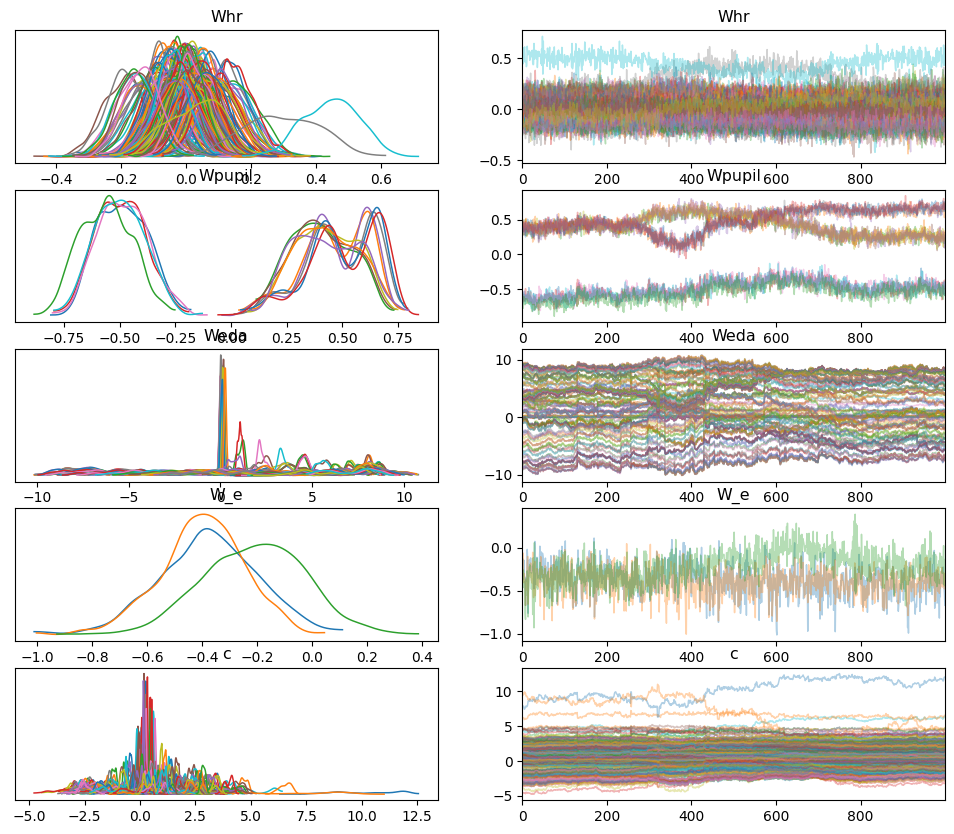

In [20]:
#az.plot_posterior(mean_field.sample(1000), color="LightSeaGreen")
az.plot_trace(trace)
plt.show()

In [21]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"pupil_data": pupil,"hr_data":hr,"eda_data":eda})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)

Sampling: [x_e, x_eda, x_hr, x_pupil]


In [22]:
e_pred = posterior_predictive.posterior_predictive["x_e"]

In [23]:
e_pred_mode = np.squeeze(stats.mode(e_pred[0], keepdims=False)[0])[:,np.newaxis]

In [24]:
e_pred_mode

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [25]:
e_labels

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [26]:
train_accuracy_exp = accuracy_score(e_labels, e_pred_mode)
print('\n\tTrain Accuracy Pain Expectation: ' + str(train_accuracy_exp))
print(' ')


	Train Accuracy Pain Expectation: 0.625
 


--------------------------------------------------------------------------------------------

In [ ]:
hr_pred_mean = (stats.median_abs_deviation(hr_pred[0]))[0]
hr_pred_mean

In [ ]:
hr[0]

In [ ]:
#hr_pred_mode= pd.Series([0.006,0.01,0.02,0.003])

hr and hr_pred_mode devono avere same shape

In [ ]:
train_accuracy_hr = (np.subtract(hr[0], hr_pred_mean))
print('\n\t avg distance hr: \n' + str(train_accuracy_hr))
#print(' ')

In [ ]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"hr_data": hr})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)
    gaze_pred = posterior_predictive.posterior_predictive["x_gaze"]

In [ ]:
gaze_pred

In [ ]:
gaze_pred_mean = np.mean(gaze_pred, axis=0).T.reshape(-1)
gaze_true = pupil.reshape(-1)
reconstructed_r2 = metrics.r2_score(gaze_true, gaze_pred_mean)

print('\n\tReconstructed X R2 score: ' + str(reconstructed_r2))

In [ ]:
import deepemogp.feature_extractor as feature_extractor

In [ ]:
f = feature_extractor.FE('wavelet', window=(8,6), params={'w_mother':'db3','w_maxlev':1})

In [ ]:
x = [3, 7, 1, 1, -2, 5, 4, 6]

In [ ]:
f.apply(x)